# Dataset Preview

### Notebook utilizado para pré visualização dos dados de exame

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#Definindo padrões de plot domínio do tempo
plot_kwargs = {
    'scalings': dict(eeg=20e-5),
    'show_scrollbars': False,
}

In [ ]:
import database.databaseutils as db
import model.summarymodelconverter as converter

db.connect()

db_object = db.summary_by_name('chb01_03.edf')
summary_model = converter.model_from_tuple( db_object )
summary_model.generate_mne()

Using matplotlib as 2D backend.


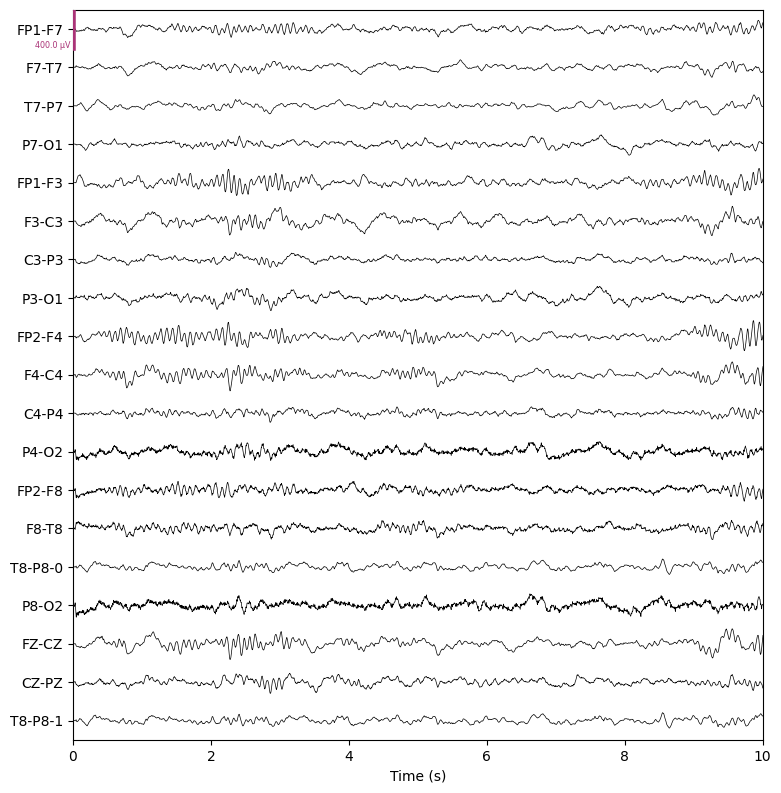

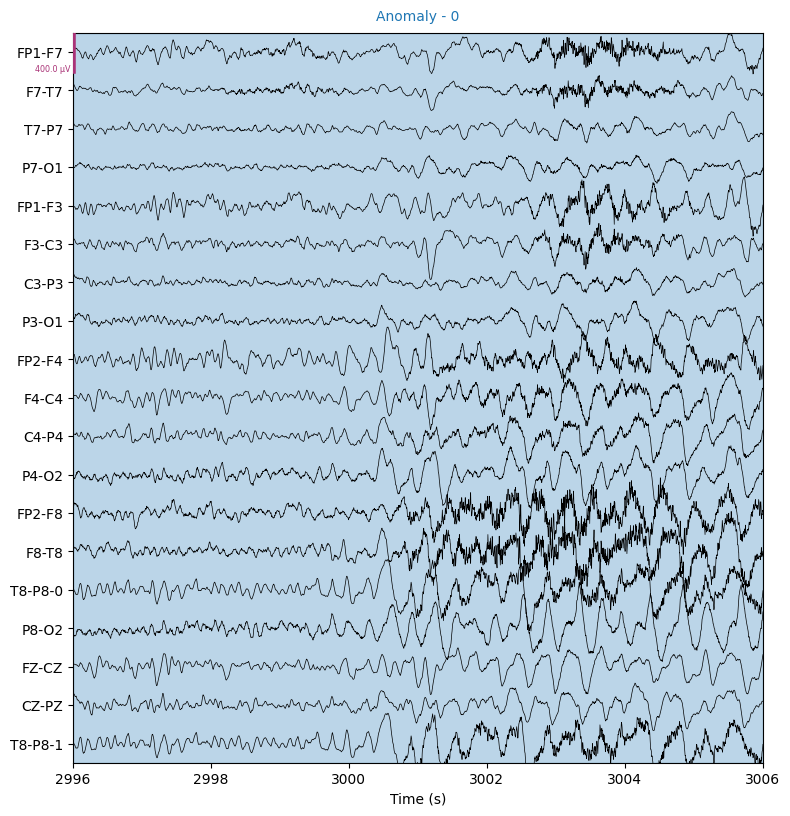

In [3]:
summary_model.time.plot(start=0, **plot_kwargs);
summary_model.time.plot(start=summary_model.start_time_of_seizure(1), **plot_kwargs);

C:\Users\luiza\AppData\Local\Temp\ipykernel_26076\3262453846.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  summary_model.psd.plot();
c:\Users\luiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


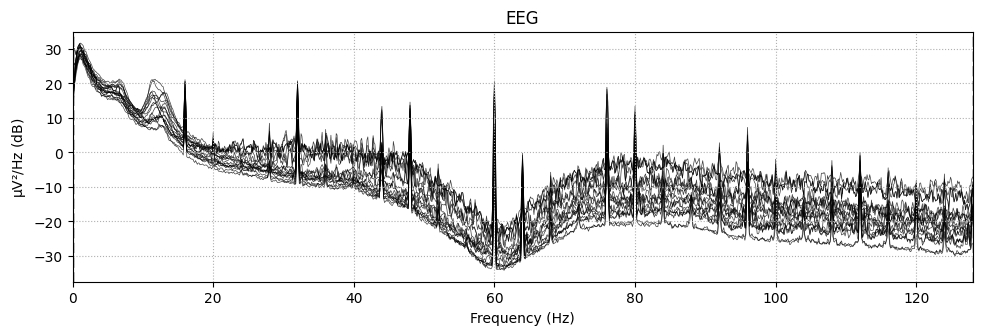

In [4]:
summary_model.psd.plot();

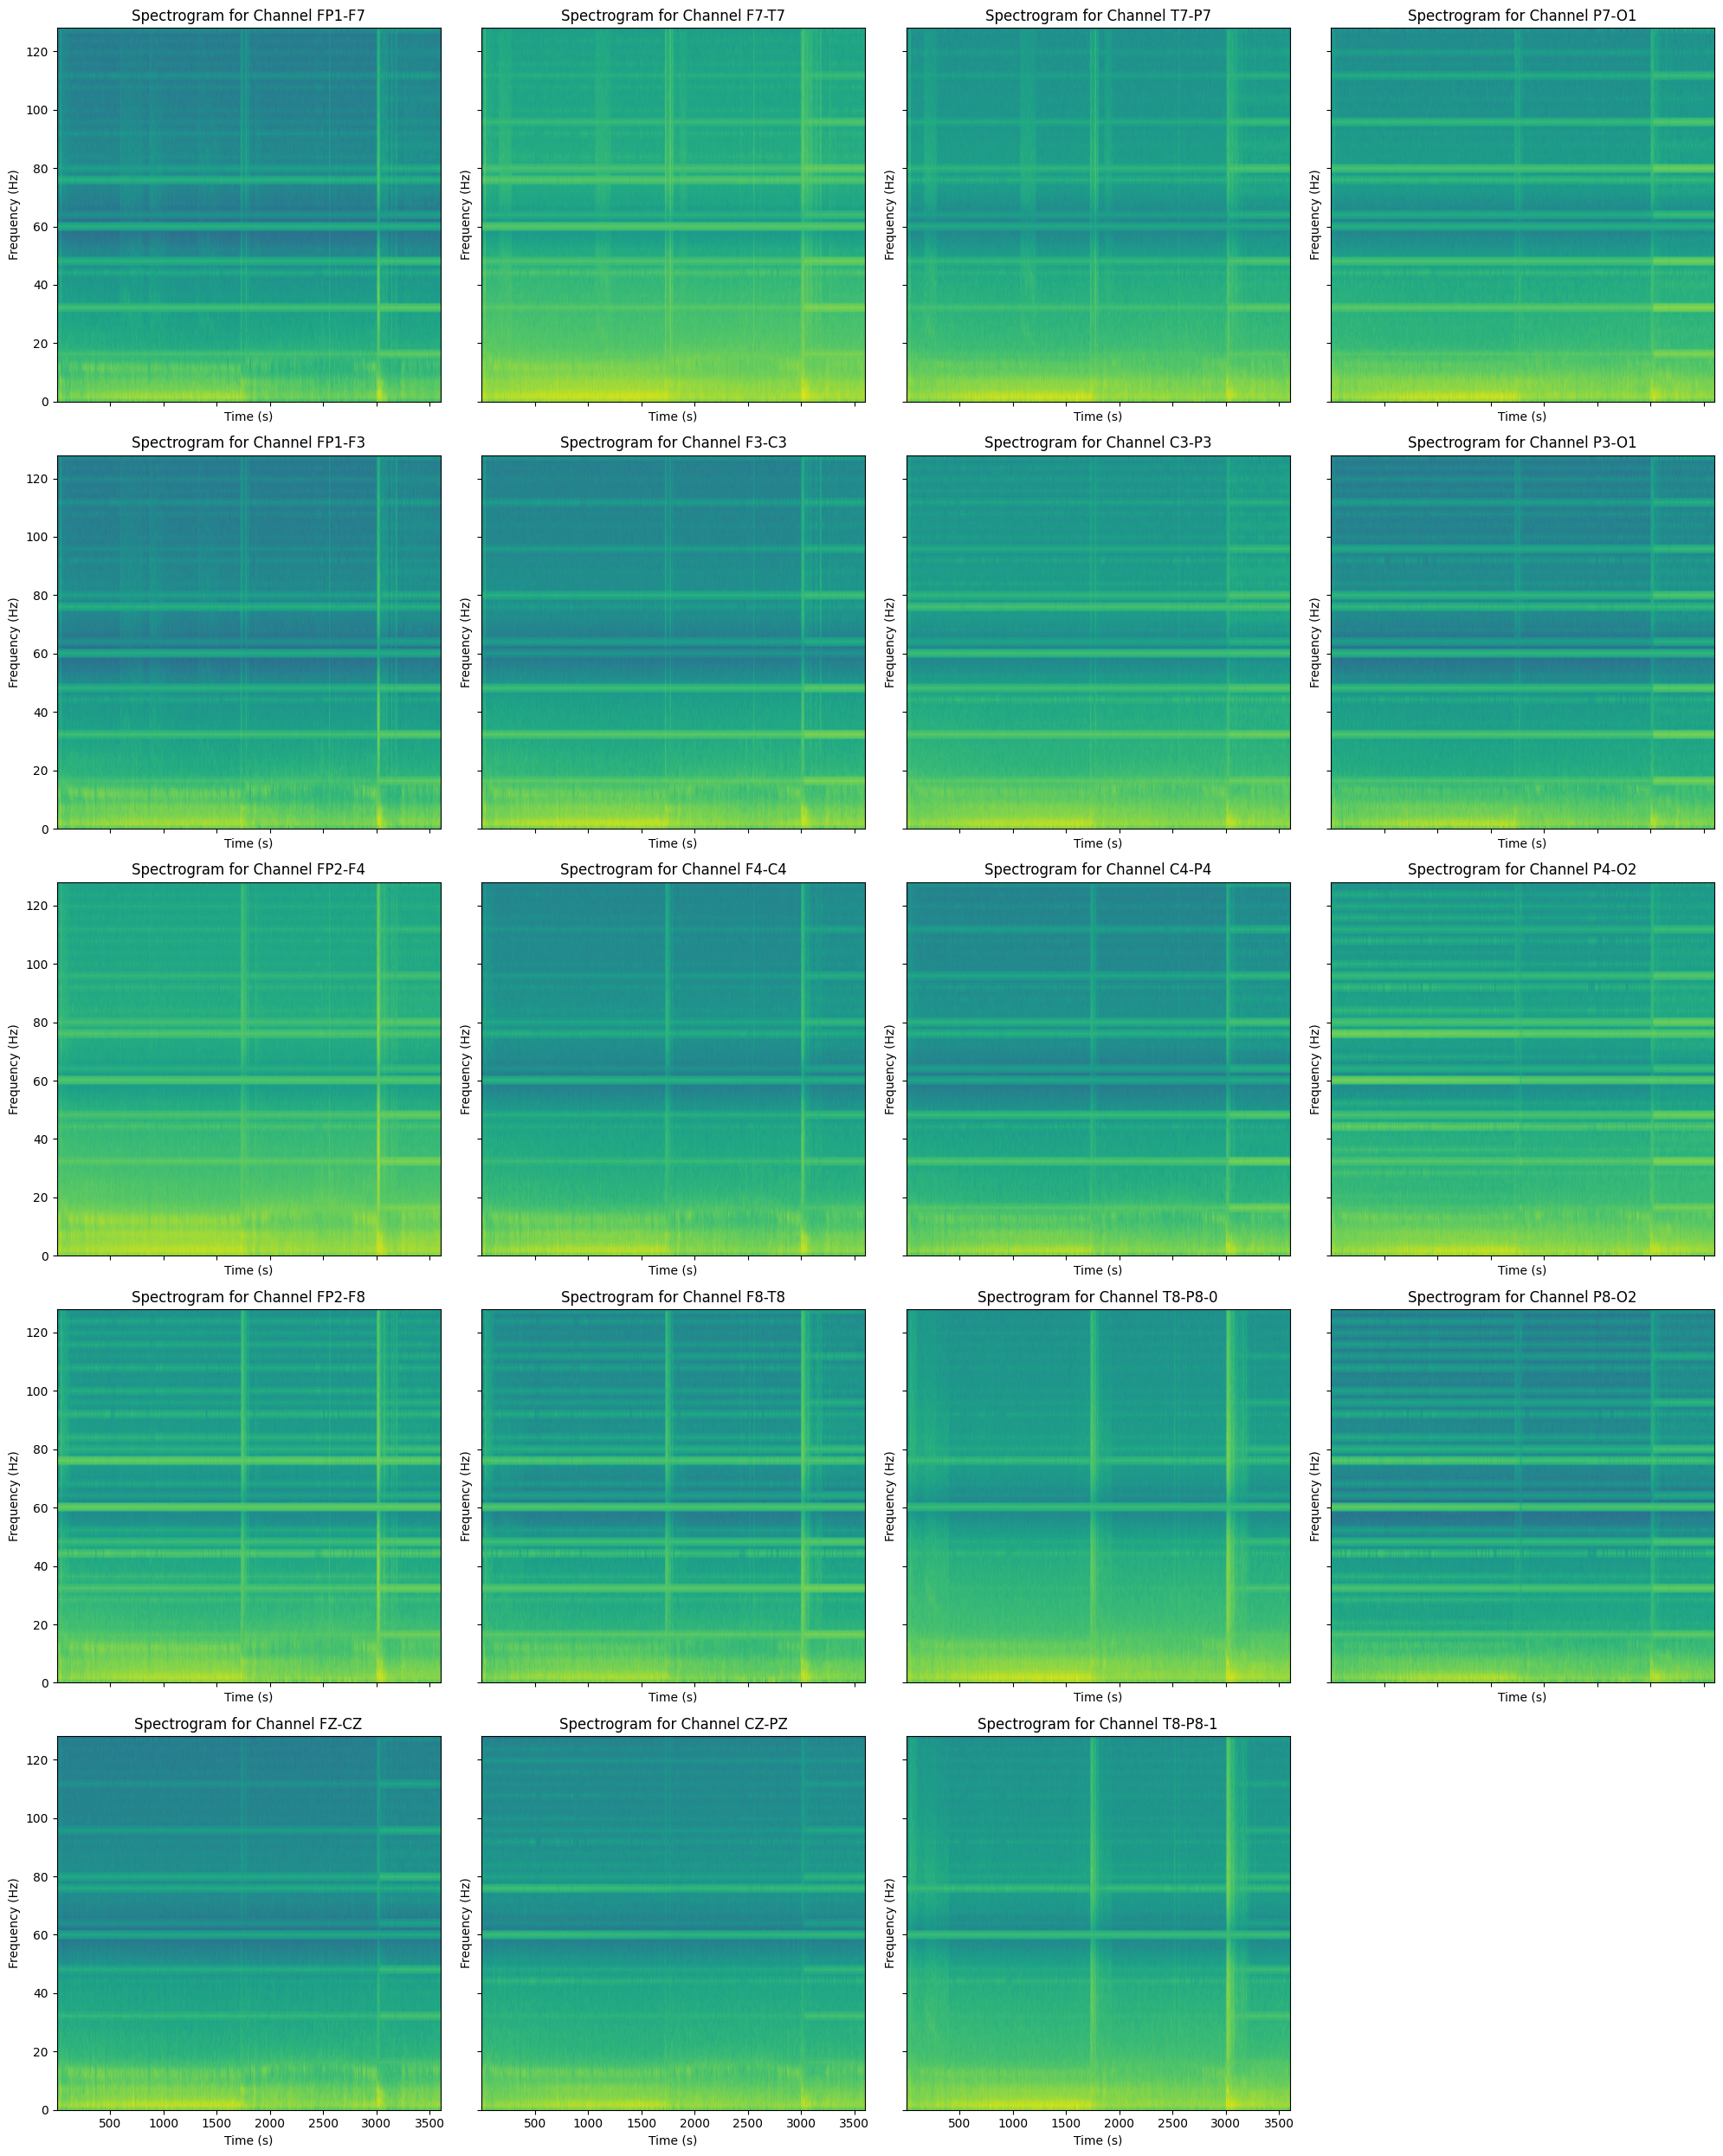

In [5]:
import numpy as np
import matplotlib.pyplot as plt

channel_buffers, times = summary_model.time.get_data(return_times=True)

num_rows = int(np.ceil(np.sqrt(len(channel_buffers))))
num_cols = int(np.ceil(len(channel_buffers) / num_rows))

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, num_rows*5), sharex=True, sharey=True)

for i, ax in enumerate(axs.flatten()):
    if i < len(channel_buffers):
        ax.specgram(channel_buffers[i], Fs=summary_model.time.info['sfreq'], NFFT=256, noverlap=128, cmap='viridis')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency (Hz)')
        ax.set_title(f'Spectrogram for Channel {summary_model.time.ch_names[i]}')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show();

In [ ]:
import model.summarymodelconverter as converter

summary_model_renamed = converter.model_from_tuple( db_object )
summary_model_renamed.generate_mne(True)

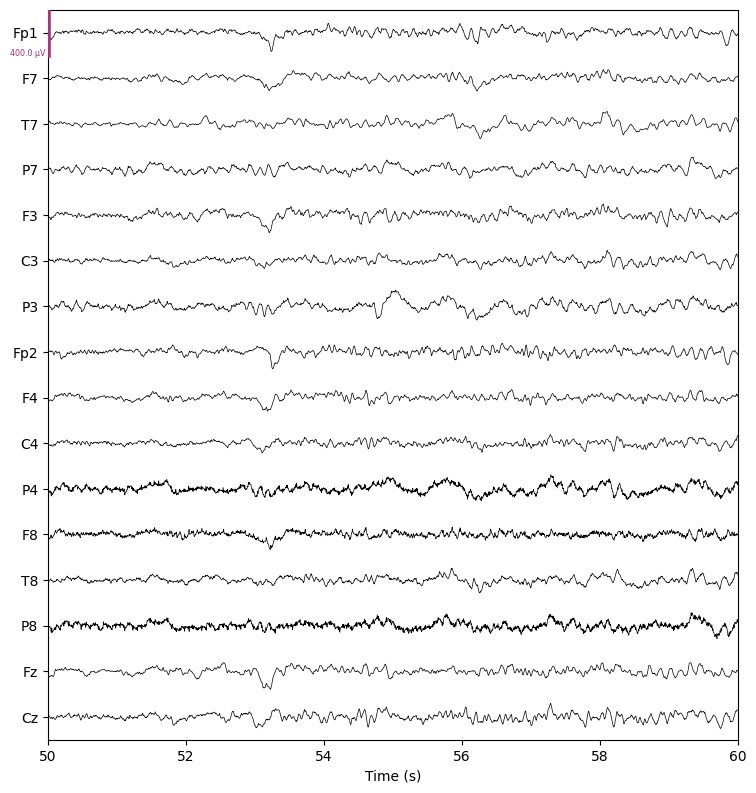

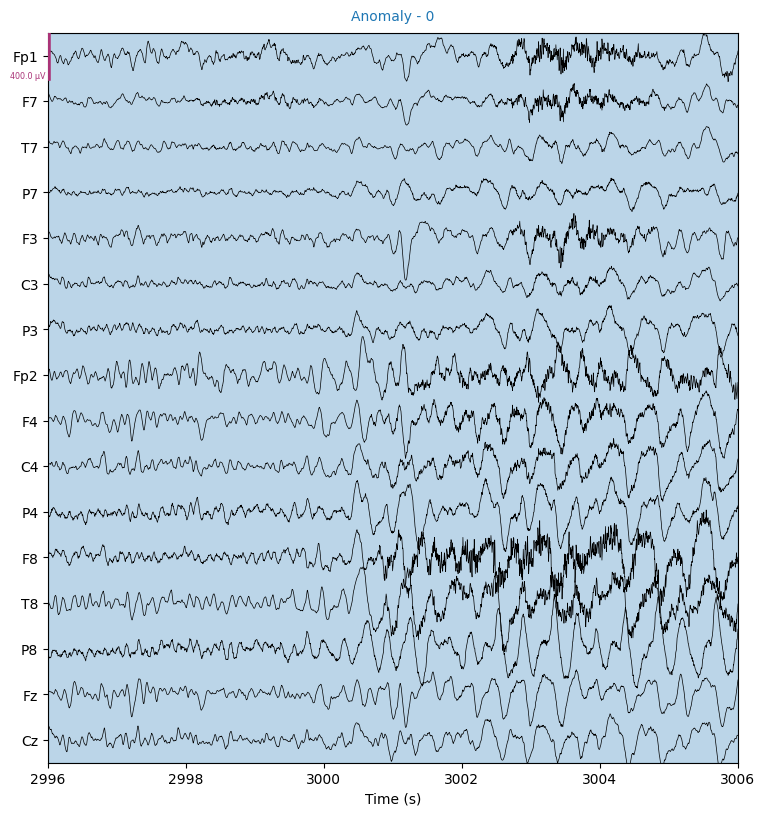

In [7]:
summary_model_renamed.time.plot(start = 50, **plot_kwargs);
summary_model_renamed.time.plot(start=summary_model.start_time_of_seizure(1), **plot_kwargs);

c:\Users\luiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


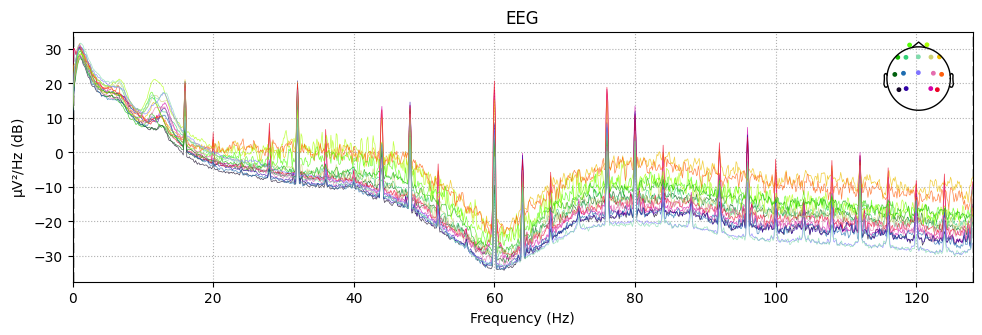

In [8]:
summary_model_renamed.psd.plot();

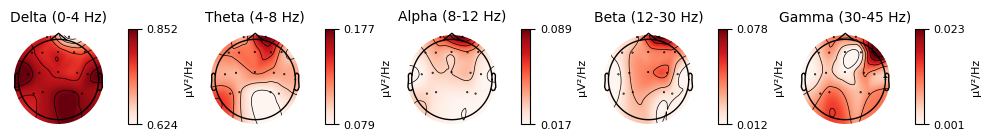

In [9]:
summary_model_renamed.psd.plot_topomap(ch_type='eeg', normalize=True);

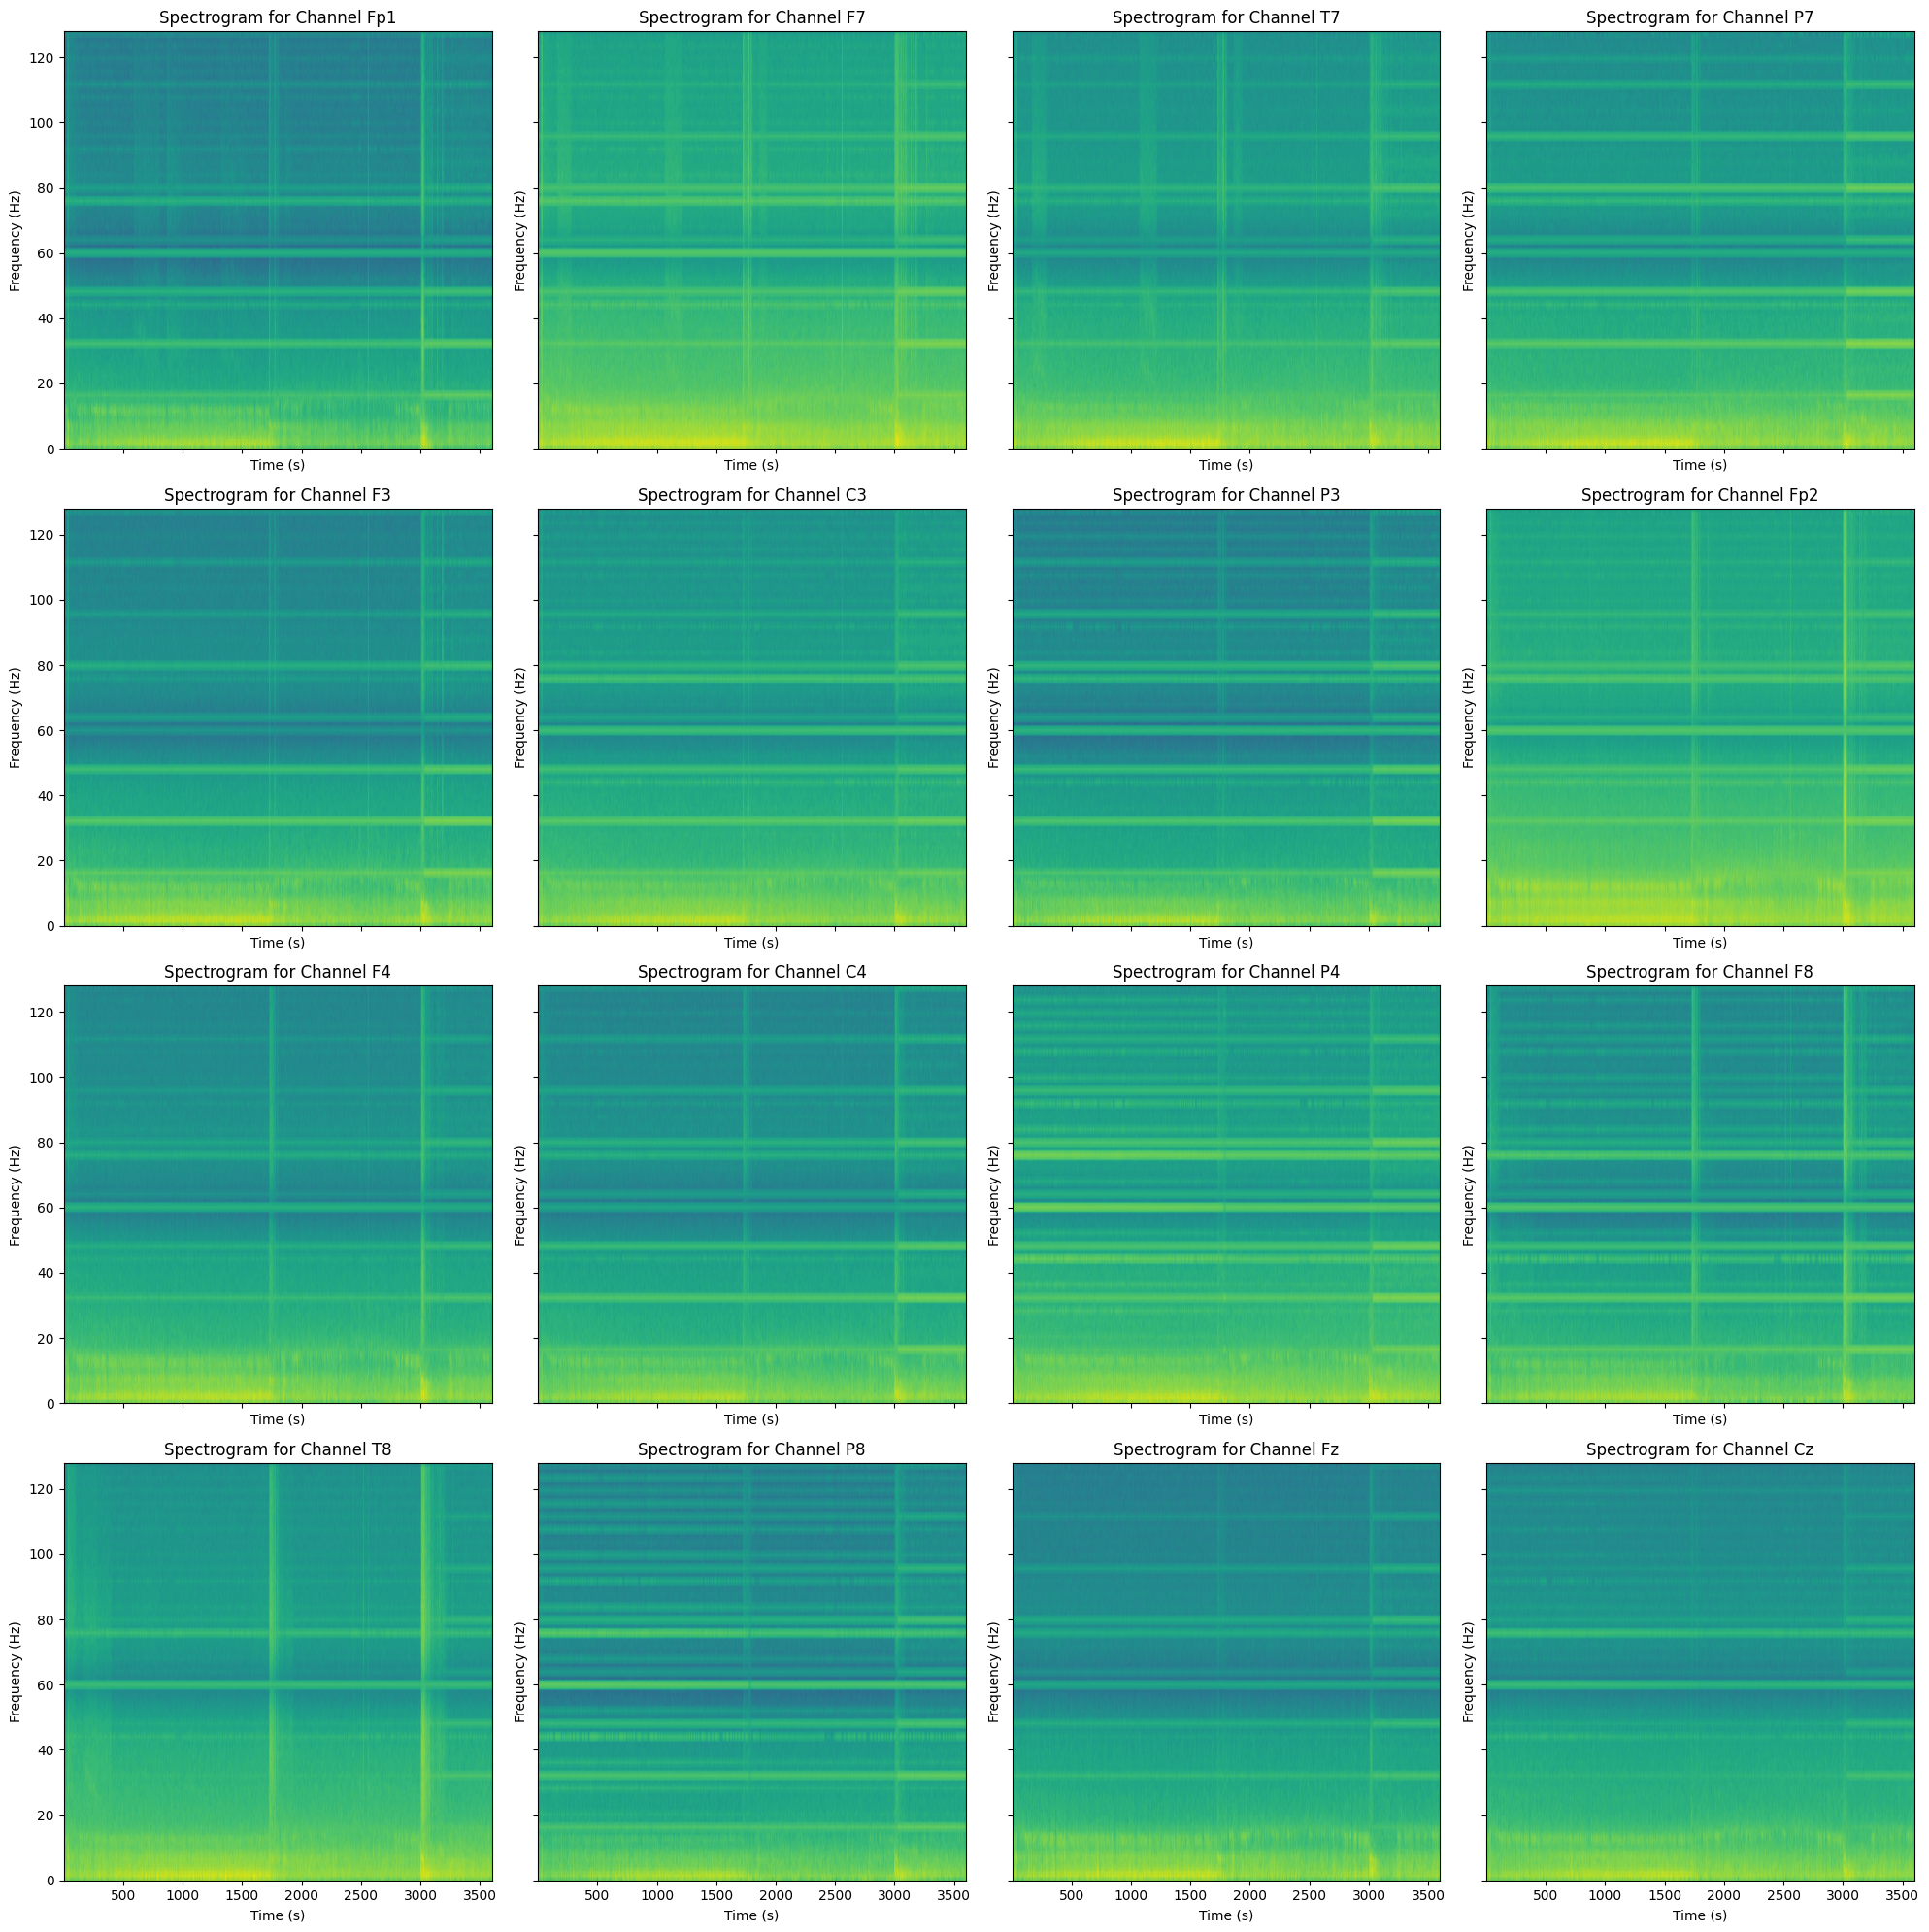

In [10]:
import numpy as np
import matplotlib.pyplot as plt

channel_buffers, times = summary_model_renamed.time.get_data(return_times=True)

num_rows = int(np.ceil(np.sqrt(len(channel_buffers))))
num_cols = int(np.ceil(len(channel_buffers) / num_rows))

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, num_rows*5), sharex=True, sharey=True)

for i, ax in enumerate(axs.flatten()):
    if i < len(channel_buffers):
        ax.specgram(channel_buffers[i], Fs=summary_model_renamed.time.info['sfreq'], NFFT=256, noverlap=128, cmap='viridis')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency (Hz)')
        ax.set_title(f'Spectrogram for Channel {summary_model_renamed.time.ch_names[i]}')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show();